In [111]:
import pandas as pd
import numpy as np
import seaborn as sns

In [112]:
df = pd.read_csv('../../data/bikeshare.csv')

In [113]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,Spring,0,0,Clear Skies,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0,1


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
datetime      10886 non-null object
season        10886 non-null object
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null object
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
count         10886 non-null int64
dtypes: float64(3), int64(4), object(3)
memory usage: 850.6+ KB


In [115]:
#Correlation between variables
df.corr()

,holiday,workingday,temp,atemp,humidity,windspeed,count
holiday,1.000000,-0.250491,0.000295,-0.005215,0.001929,0.008409,-0.005393
workingday,-0.250491,1.000000,0.029966,0.024660,-0.010880,0.013373,0.011594
temp,0.000295,0.029966,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,-0.005215,0.024660,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,0.001929,-0.010880,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,0.008409,0.013373,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,-0.005393,0.011594,0.394454,0.389784,-0.317371,0.101369,1.000000


In [116]:
#check for missing values
df.isnull().sum()
#No missing values as shown below so no need for imputation. 
#However, if we did have missing values we could impute them using the mean value.

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

In [117]:
#create a variable "month" and "year" out of datetime
df['month'] = pd.DatetimeIndex(df['datetime']).month
df['year'] = pd.DatetimeIndex(df['datetime']).year
df.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,count,month,year
count,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.028569,0.680875,20.23086,23.655084,61.886460,12.799395,191.574132,6.521495,2011.501929
std,0.166599,0.466159,7.79159,8.474601,19.245033,8.164537,181.144454,3.444373,0.500019
min,0.000000,0.000000,0.82000,0.760000,0.000000,0.000000,1.000000,1.000000,2011.000000
25%,0.000000,0.000000,13.94000,16.665000,47.000000,7.001500,42.000000,4.000000,2011.000000
50%,0.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000,7.000000,2012.000000
75%,0.000000,1.000000,26.24000,31.060000,77.000000,16.997900,284.000000,10.000000,2012.000000
max,1.000000,1.000000,41.00000,45.455000,100.000000,56.996900,977.000000,12.000000,2012.000000


In [118]:
#cheching the average count by month in order to see where the highest values occur.
agg = df.groupby("month")["count"].mean()
agg

month
1      90.366516
2     110.003330
3     148.169811
4     184.160616
5     219.459430
6     242.031798
7     235.325658
8     234.118421
9     233.805281
10    227.699232
11    193.677278
12    175.614035
Name: count, dtype: float64

In [119]:
#cheching the average count by weather conditions in order to see where the highest values occur.
agg = df.groupby("weather")["count"].mean()
agg

weather
Clear Skies          205.236791
Heavy Storms/Rain    164.000000
Light Storms/Rain    118.846333
Partly Cloudy        178.955540
Name: count, dtype: float64

In [120]:
# create a binary for the high count months around summer

mapping = {
    1 : 0, 
    2 : 0, 
    3 : 0, 
    4 : 0, 
    5 : 1,
    6 : 1,
    7 : 1,
    8 : 1,
    9 : 1,
    10 : 1,
    11 : 0,
    12 : 0    
}

df['summer_months'] = df['month'].map(mapping)

mapping1 = {
    'Clear Skies' : 1, 
    'Heavy Storms/Rain' : 0, 
    'Light Storms/Rain' : 0, 
    'Partly Cloudy' : 0, 
}

df['clear_skies'] = df['weather'].map(mapping1)

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,month,year,summer_months,clear_skies
0,2011-01-01 00:00:00,Spring,0,0,Clear Skies,9.84,14.395,81,0.0,16,1,2011,0,1
1,2011-01-01 01:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0,40,1,2011,0,1
2,2011-01-01 02:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0,32,1,2011,0,1
3,2011-01-01 03:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0,13,1,2011,0,1
4,2011-01-01 04:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0,1,1,2011,0,1


In [121]:
#Define X and y. 
X = df[['holiday' , 'workingday' , 'temp' , 'humidity' , 'summer_months',  'clear_skies']]
y = df['count']

X.shape

(10886, 6)

In [122]:
#create a train and validation sample
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y , test_size=0.2, random_state=2020)

In [123]:
#scale the data and check that the average is zero or very close to zero
num_col = X_train.select_dtypes(include=np.number).columns.tolist()

X_train_means = X_train[num_col].mean()
X_train_std = X_train[num_col].std()

X_train[num_col] -= X_train_means
X_train[num_col] /= X_train_std

X_test[num_col] -= X_train_means
X_test[num_col] /= X_train_std

X_train.describe()

,holiday,workingday,temp,humidity,summer_months,clear_skies
count,8.708000e+03,8.708000e+03,8.708000e+03,8.708000e+03,8.708000e+03,8.708000e+03
mean,-7.666824e-16,-4.769828e-16,-5.731418e-15,-3.348646e-16,-5.651071e-16,4.833575e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.768084e-01,-1.455564e+00,-2.484580e+00,-3.230125e+00,-9.990244e-01,-1.395223e+00
25%,-1.768084e-01,-1.455564e+00,-8.015211e-01,-7.798344e-01,-9.990244e-01,-1.395223e+00
50%,-1.768084e-01,6.869398e-01,4.000841e-02,2.173241e-03,-9.990244e-01,7.166492e-01
75%,-1.768084e-01,6.869398e-01,7.763468e-01,7.972144e-01,1.000862e+00,7.166492e-01
max,5.655190e+00,6.869398e-01,2.669788e+00,1.983259e+00,1.000862e+00,7.166492e-01


In [124]:
#Fit a model
from sklearn.linear_model import LinearRegression # for linear Regression
lreg = LinearRegression()
lreg
#get the R-squared
lreg.fit(X_train , y_train).score(X_train,y_train)

0.24519116864781498

In [125]:
# this is the part where we use KFold to find your validation score
from sklearn.model_selection import cross_val_score
lreg = LinearRegression()
# we'll use a loop to go through these
cv_scores = []
num_folds = [5, 10, 15]

for fold in num_folds:
    scores = cross_val_score(estimator=lreg, X=X_train, y=y_train, cv=fold)
    cv_scores.append(scores)

In [126]:
# using teh mean score on to choose our number of "folds"
cv_dict = {}
for idx, fold in enumerate(num_folds):
    cv_dict[f'folds: {fold}'] = np.mean(cv_scores[idx])

In [127]:
# scores are roughly the same, but lower than just the general validation score
# we had before
cv_dict
#based on the below I will use folds=6 in order and try to improv the average score by:
#- looking at p-values
#- will try to include more variables

{'folds: 5': 0.24315541101087854,
 'folds: 10': 0.2426644783670627,
 'folds: 15': 0.243101551036457}

In [128]:
#check the p-values in order to determine statistical significance
import statsmodels.api as sm
from statsmodels.tools import add_constant

X_train = add_constant(X_train)
mod = sm.OLS(y_train, X_train)

# because we loaded in y and X previously, no need to use them here
results = mod.fit()

# the results() object provides a lot of data, most importantly the summary(), which we can see here
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     471.1
Date:                Wed, 11 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:31:37   Log-Likelihood:                -56412.
No. Observations:                8708   AIC:                         1.128e+05
Df Residuals:                    8701   BIC:                         1.129e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           191.1448      1.688    113.227

C:\Users\simos\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [129]:
#remove variables that are insignificant and including an extra variable as w try to increase the R-squared
X = df[['temp' , 'humidity' , 'summer_months',  'clear_skies' , 'year']]
y = df['count']
X_train, X_test, y_train, y_test  = train_test_split(X, y , test_size=0.2, random_state=2020)
num_col = X_train.select_dtypes(include=np.number).columns.tolist()

X_train_means = X_train[num_col].mean()
X_train_std = X_train[num_col].std()

X_train[num_col] -= X_train_means
X_train[num_col] /= X_train_std

X_test[num_col] -= X_train_means
X_test[num_col] /= X_train_std

C:\Users\simos\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [130]:
import statsmodels.api as sm
from statsmodels.tools import add_constant

X_train = add_constant(X_train)
mod = sm.OLS(y_train, X_train)

# because we loaded in y and X previously, no need to use them here
results = mod.fit()

# the results() object provides a lot of data, most importantly the summary(), which we can see here
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     711.2
Date:                Wed, 11 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:31:53   Log-Likelihood:                -56145.
No. Observations:                8708   AIC:                         1.123e+05
Df Residuals:                    8702   BIC:                         1.123e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           191.1448      1.637    116.759

In [ ]:
# R-squared has increased a bit but it is still pretty low. Therefore I will now try to transform the independent variables
# to see if I this will improve the fit of the model 
# I will do that by looking at bivariate plots between each IV and the DV 

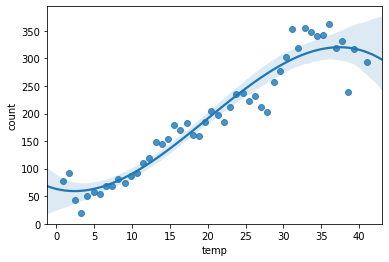

In [132]:
#Bivariate Plots tool
import seaborn as sns
agg_temp = df.groupby("temp")["count"].mean()
agg_temp = pd.DataFrame(data=agg_temp)
agg_temp.reset_index(inplace=True)
sns.regplot(x='temp' , y = 'count', order=3, data=agg_temp)

In [133]:
#order =3 seems to capture the actuals better
X_train['temp'] = X_train['temp']**3

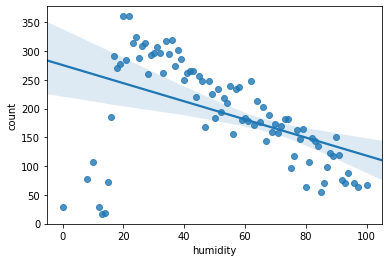

In [134]:
agg_hum = df.groupby("humidity")["count"].mean()
agg_hum = pd.DataFrame(data=agg_hum)
agg_hum.reset_index(inplace=True)
sns.regplot(x='humidity' , y = 'count', order=1, data=agg_hum)

In [135]:
#
#flooring teh variable to 20 as we observe a few outliers
X_train['humidity'] = np.log(X_train['humidity'] + 4)

# the rest of the variables are binary so we will not look into them

In [136]:
#Rerun the regression to see how our results change
X_train = add_constant(X_train)
mod = sm.OLS(y_train, X_train)

# because we loaded in y and X previously, no need to use them here
results = mod.fit()

# the results() object provides a lot of data, most importantly the summary(), which we can see here
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     600.7
Date:                Wed, 11 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:35:15   Log-Likelihood:                -56346.
No. Observations:                8708   AIC:                         1.127e+05
Df Residuals:                    8702   BIC:                         1.127e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           452.0334      9.506     47.551

In [ ]:
#it did not help much in terms of R-Squared but did get a sign correction on  summer months